# <span style="color:royalblue"><center> Clustering con K-Means </center></span>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### Preprocessing de los datos

In [3]:
X,y,c = make_blobs(500, #Número de puntos
                   cluster_std=0.8, #STD del datapoint
                   centers=4, #Centroides
                   n_features=2, #2 Dimensiones
                   return_centers=True) #Que si devuelva las coordenadas de mean

In [4]:
df_blobs = pd.DataFrame({
    'x1':X[:,0],
    'x2':X[:,1],
    'y':y
})
df_blobs

,x1,x2,y
0,2.909066,-5.827978,1
1,-8.556541,1.172998,0
2,-7.506844,0.370909,0
3,6.536865,3.458910,3
4,-0.494609,-3.814879,1
...,...,...,...
495,-7.561033,0.665879,0
496,-10.088724,0.771426,0
497,-2.870927,0.664981,2
498,0.950448,-5.397622,1


In [5]:
df_centers = pd.DataFrame({
    'x1':c[:,0],
    'x2':c[:,1]
})
df_centers

,x1,x2
0,-8.422831,0.130806
1,0.748971,-5.427605
2,-2.888001,0.869571
3,4.978859,3.818599


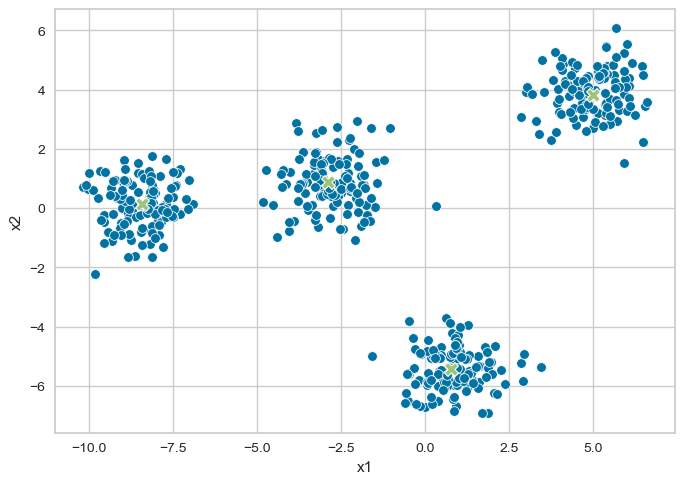

In [6]:
sns.scatterplot(data=df_blobs,
               x=df_blobs['x1'],
               y=df_blobs['x2'])
sns.scatterplot(data=df_centers,
               x=df_centers['x1'],
               y=df_centers['x2'],
               marker='X',
               s=100)
plt.show()

### K-Means

In [7]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_kmeans_center = pd.DataFrame({
    'x1':k_means_centers[:,0],
    'x2':k_means_centers[:,1]
})


C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


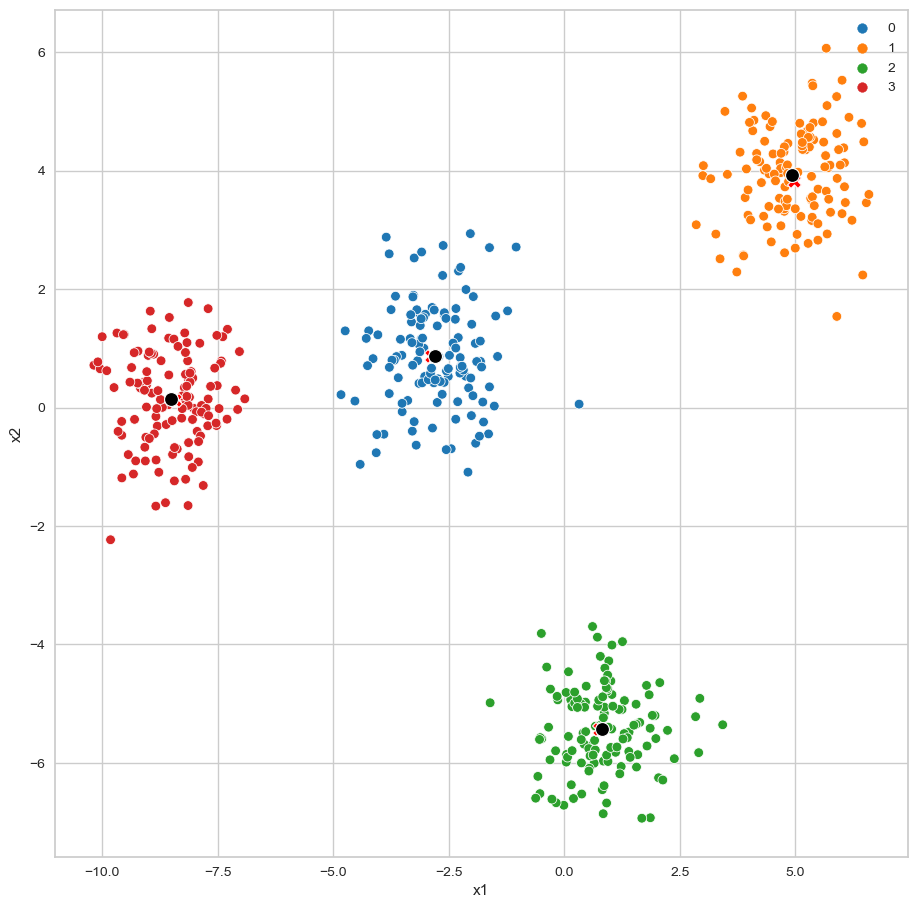

In [8]:
plt.figure(figsize=(11,11))
sns.scatterplot(data=df_blobs,
                x=df_blobs['x1'],
                y=df_blobs['x2'],
                hue='cluster',
                palette='tab10')
sns.scatterplot(data=df_centers,
               x=df_centers['x1'],
               y=df_centers['x2'],
               marker='X',
               s=100,
               color='red')
sns.scatterplot(data=df_kmeans_center,
               x=df_kmeans_center['x1'],
               y=df_kmeans_center['x2'],
               marker='o',
               s=100,
               color='black')
plt.show()

In [9]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k,n_init=10)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_kmeans_center = pd.DataFrame({
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
    })
#-------DataViz
    plt.figure(figsize=(11,11))
    sns.scatterplot(data=df_blobs,
                    x=df_blobs['x1'],
                    y=df_blobs['x2'],
                    hue='cluster',
                    palette='tab10')
    sns.scatterplot(data=df_centers,
                   x=df_centers['x1'],
                   y=df_centers['x2'],
                   marker='X',
                   s=100,
                   color='red')
    sns.scatterplot(data=df_kmeans_center,
                   x=df_kmeans_center['x1'],
                   y=df_kmeans_center['x2'],
                   marker='o',
                   s=100,
                   color='black')
    plt.show()

El número de clusters es de 3


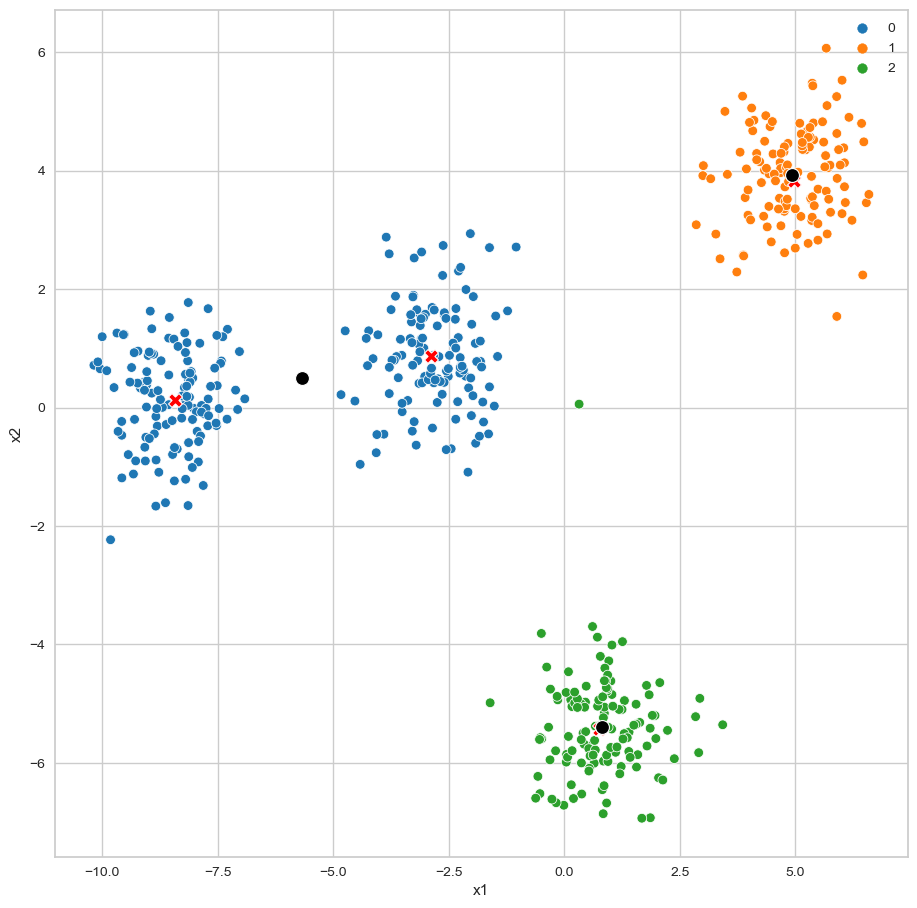

El número de clusters es de 4


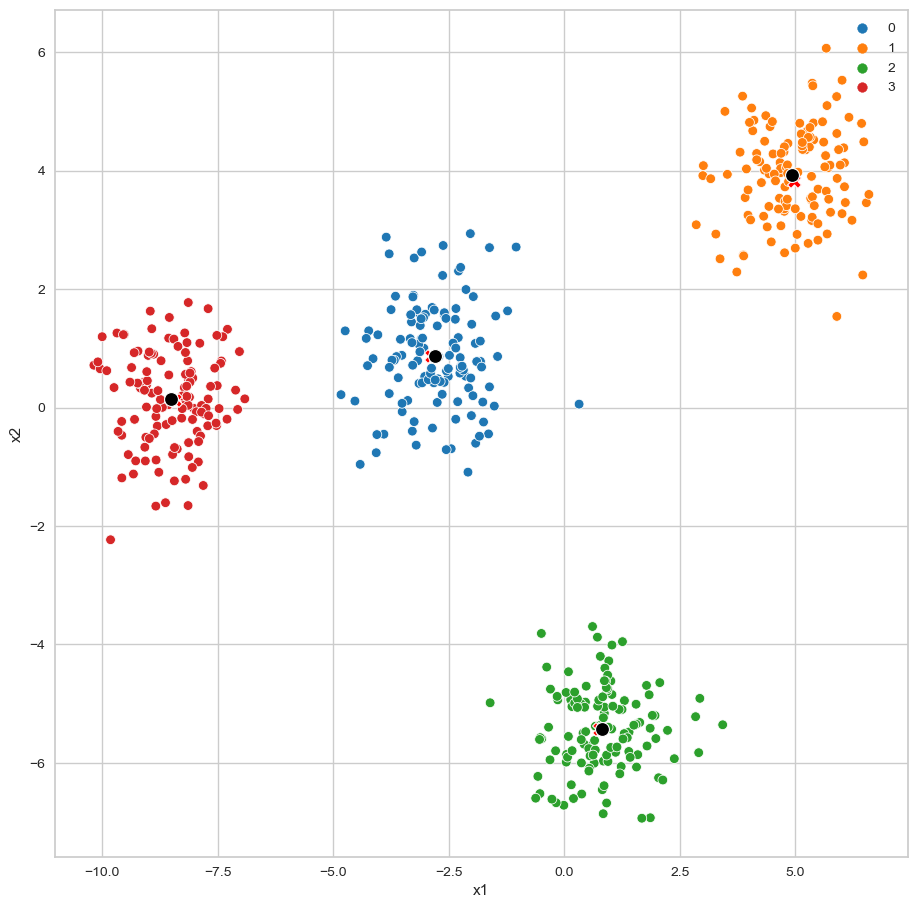

El número de clusters es de 5


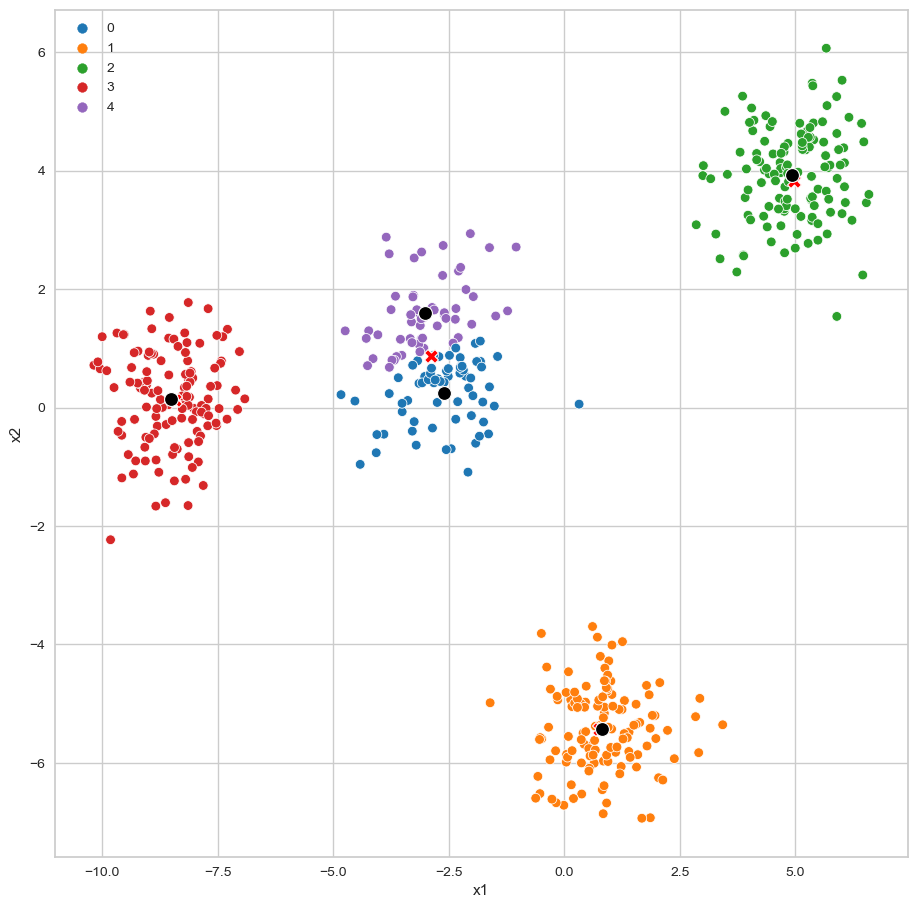

El número de clusters es de 6


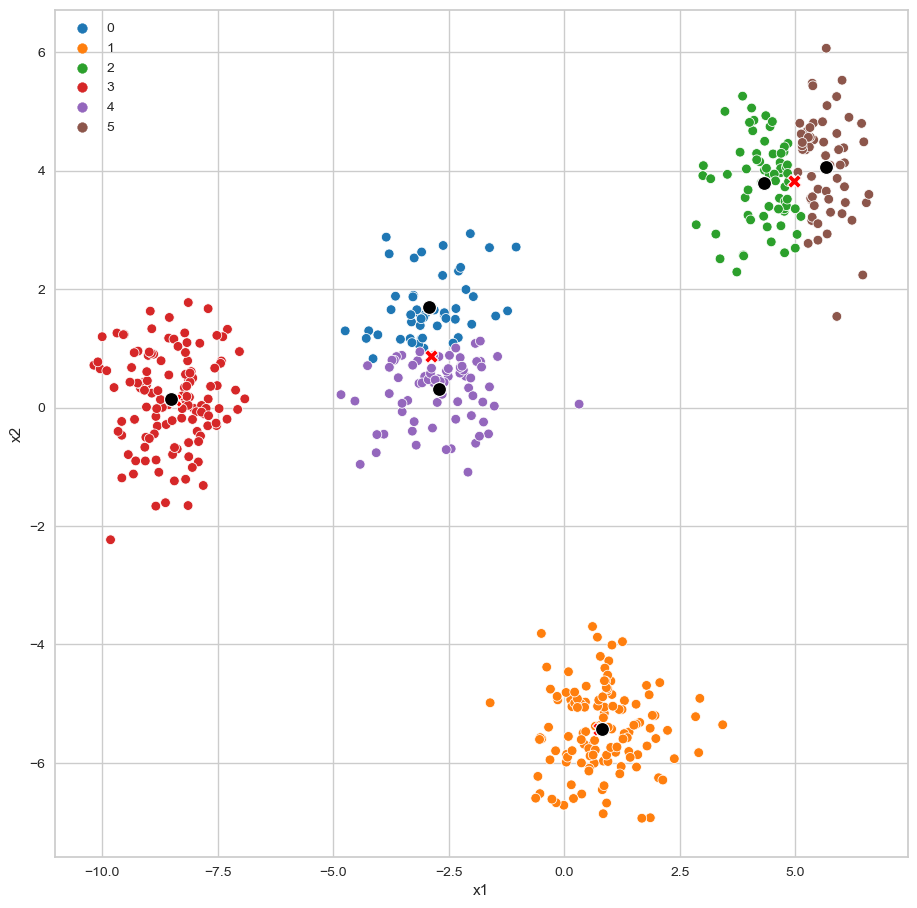

In [10]:
for i in range(3,7):
    print(f'El número de clusters es de {i}')
    vis_cluster(i)

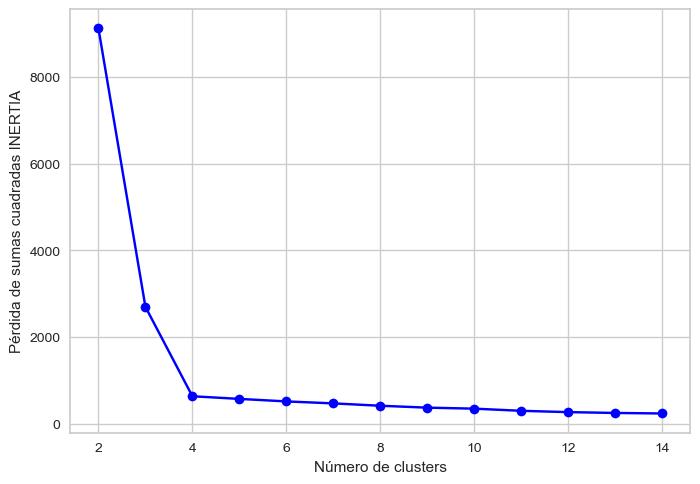

In [11]:
sum_of_squared_distance = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters = k,n_init=10)
    km.fit(X)
    sum_of_squared_distance.append(km.inertia_)
plt.plot(K,sum_of_squared_distance,color='blue',
        marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Pérdida de sumas cuadradas INERTIA')
plt.show()

In [12]:
sum_of_squared_distance

[9120.278141177338,
 2694.4313392758,
 630.4032536276786,
 569.7895558880771,
 511.66799140393357,
 466.26827905531104,
 411.60627136634025,
 367.9168838243271,
 344.4298194307744,
 294.8629293348033,
 264.54034476497276,
 245.40821693674775,
 233.35804471145036]

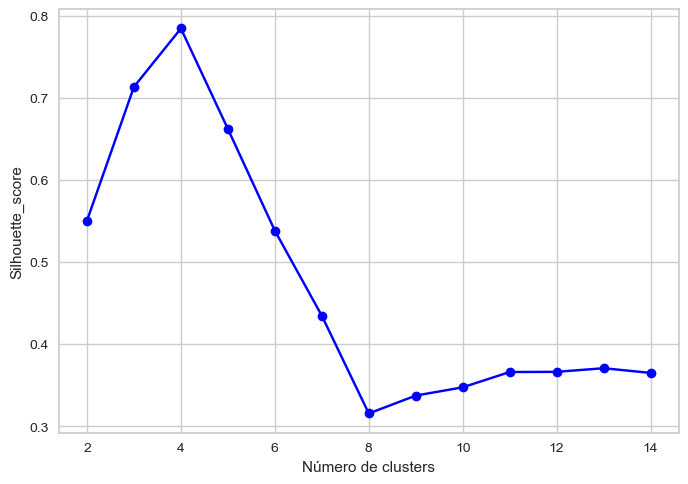

In [13]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters = k,n_init=10)
    km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))
plt.plot(K,silhouette_scores,color='blue',
        marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette_score')
plt.show()

### Evaluando los clusters con KMeans

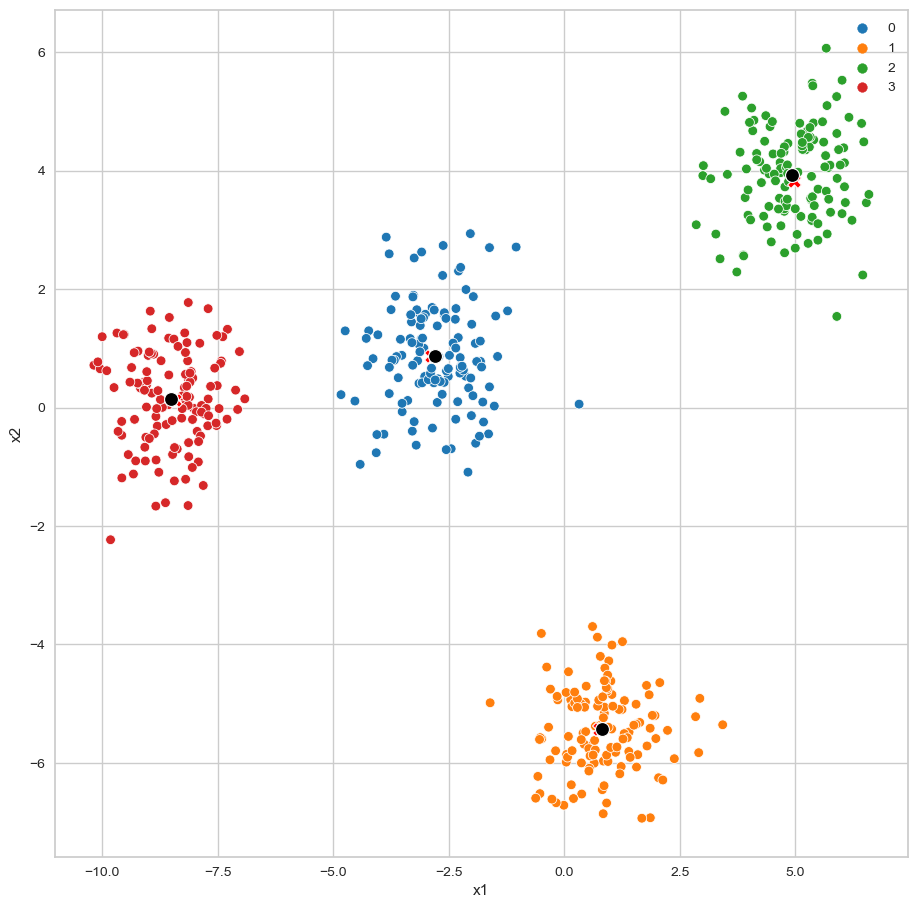

In [14]:
vis_cluster(4)

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

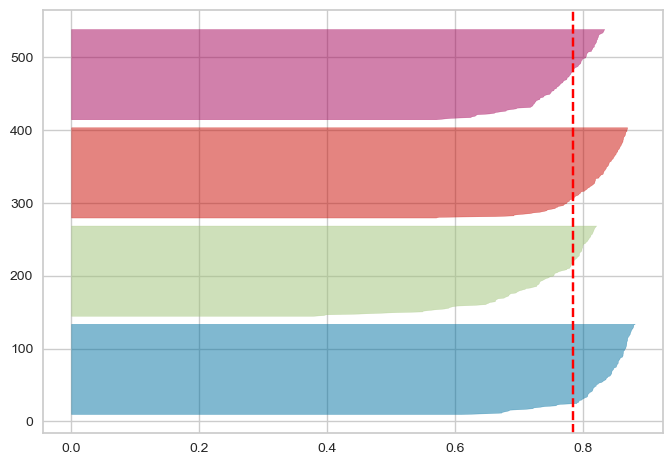

In [15]:
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)

# <span style="color:royalblue"><center> Hierarchical CLustering </center></span>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

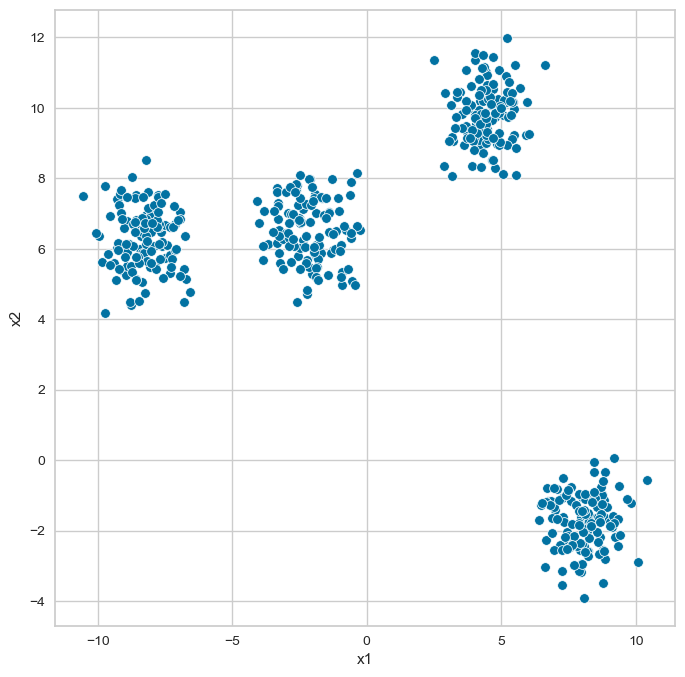

In [18]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

### Dendrograma y Hierarchical Clustering

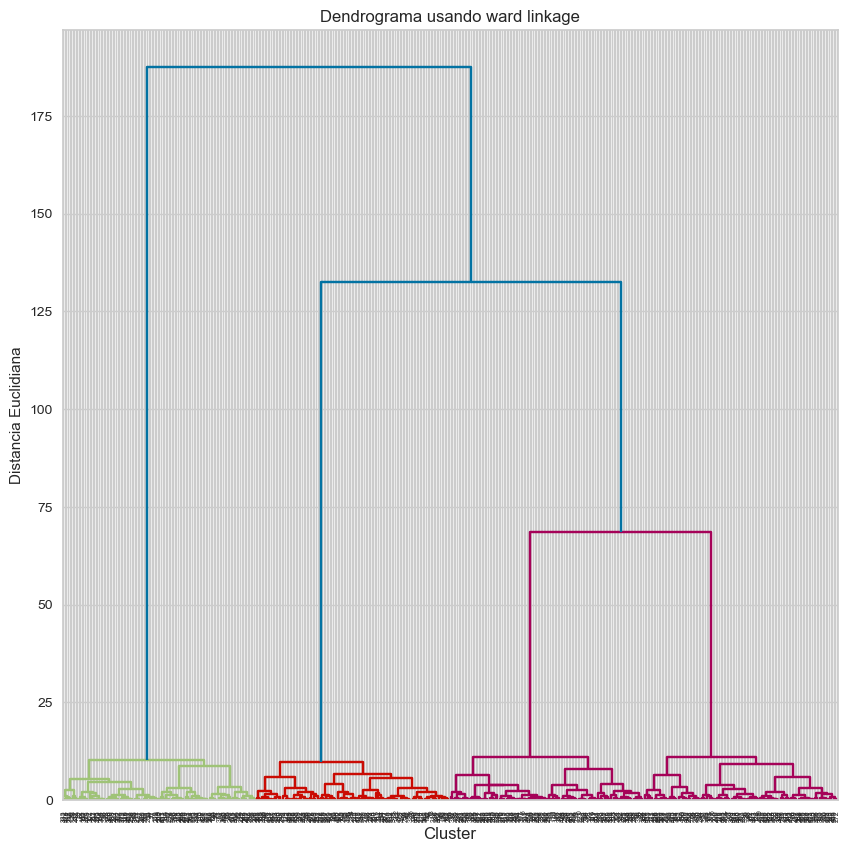

In [19]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [29]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
df_blobs['cluster'] = y_hc

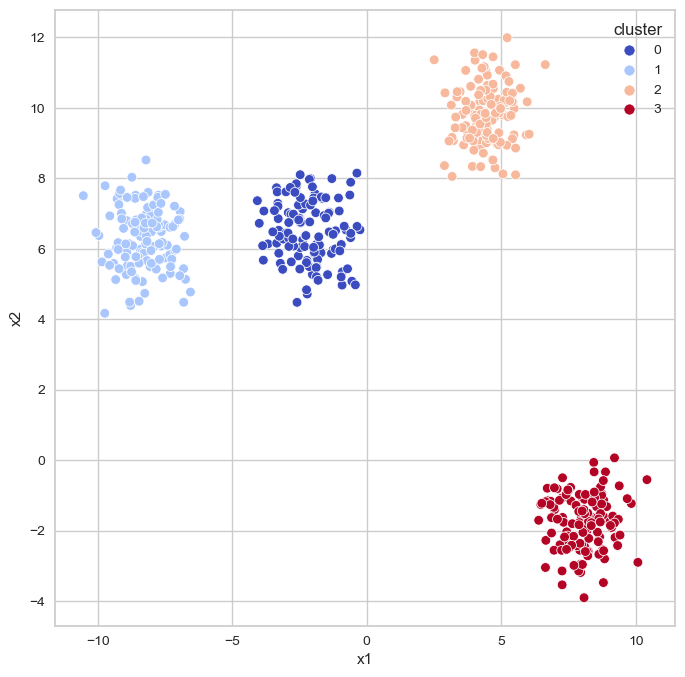

In [31]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()

### Evaluando el modelo

In [32]:
silhouette_score(X,y_hc)

0.7977375190580605

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7303329320823113
For n_clusters = 4 The average silhouette_score is : 0.7977375190580605
For n_clusters = 5 The average silhouette_score is : 0.6835737927352157


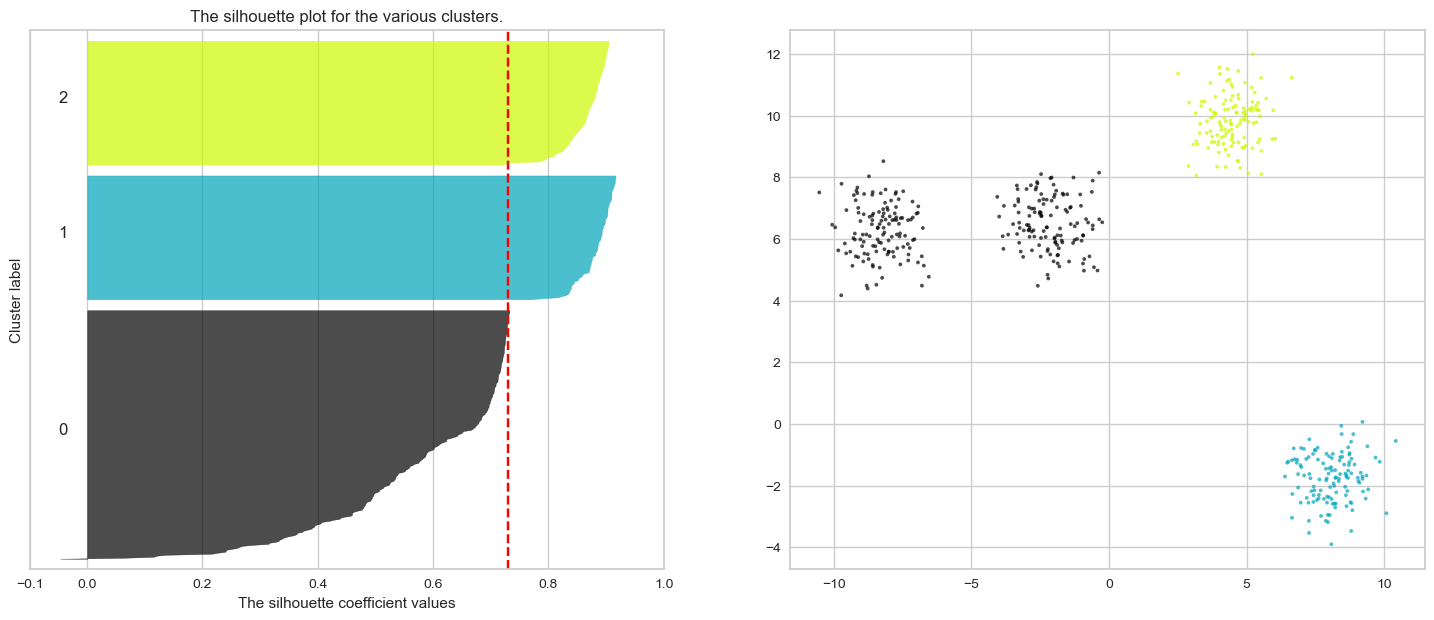

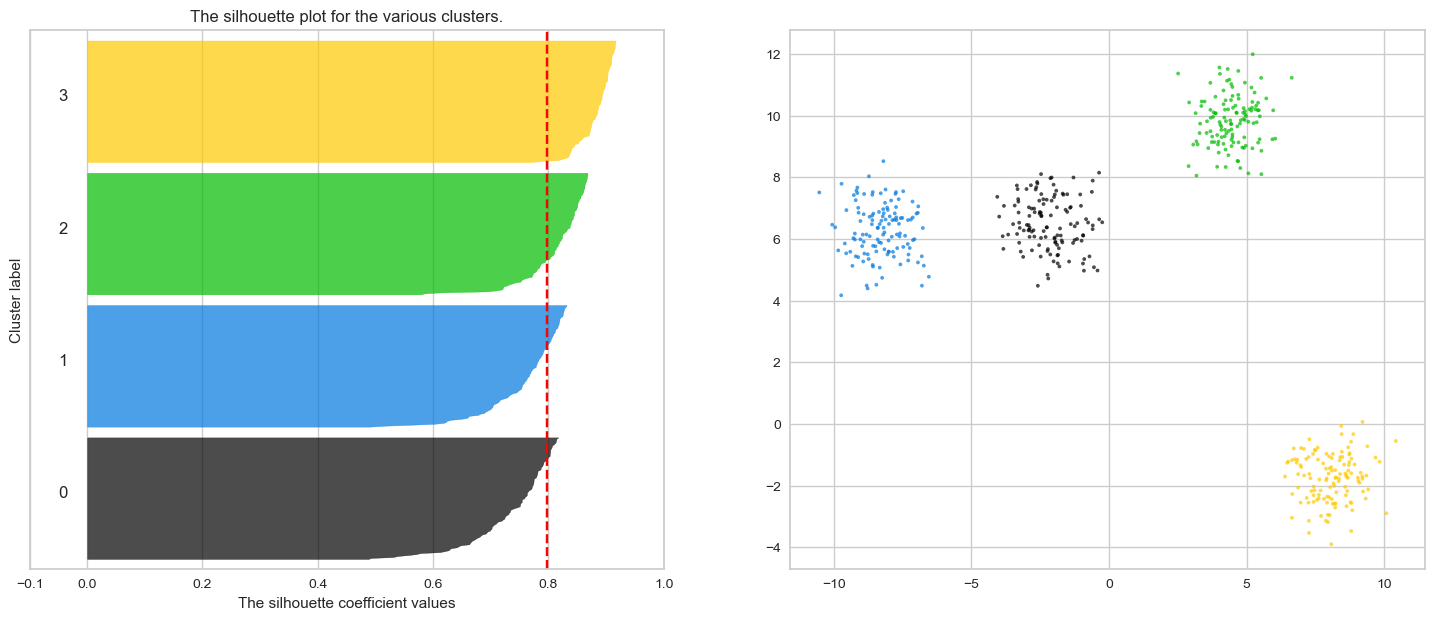

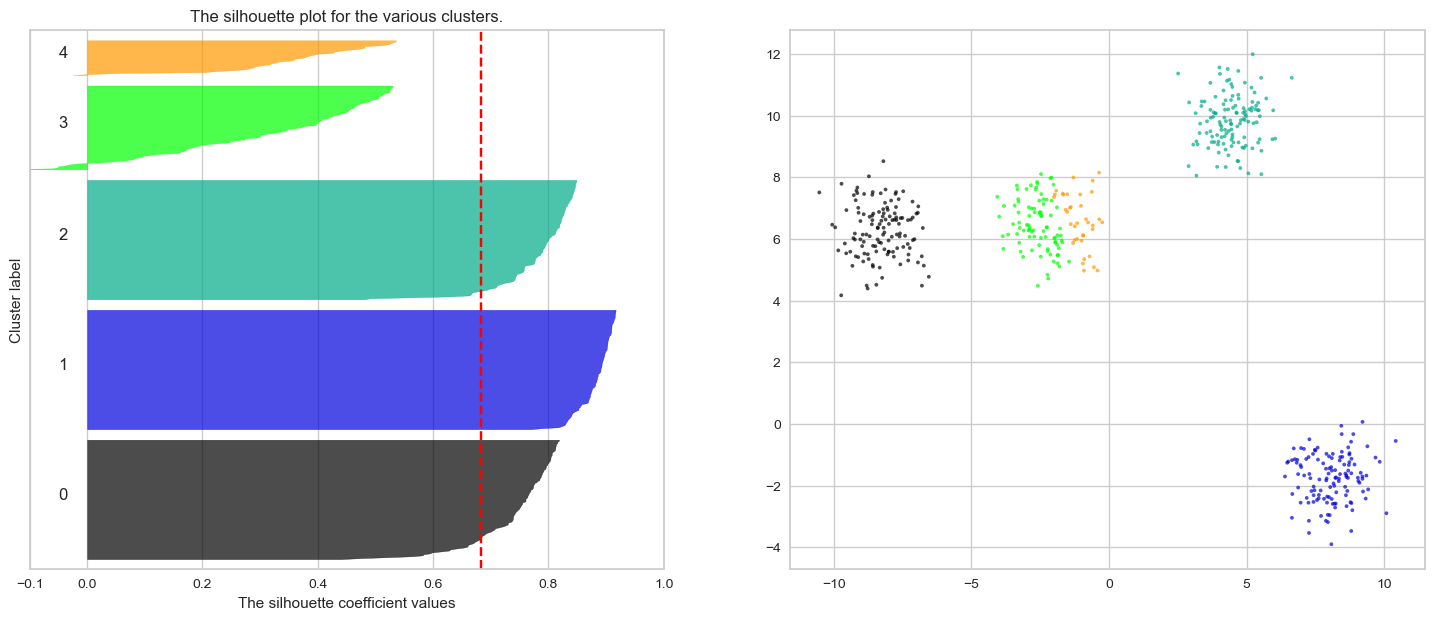

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
plt.show()